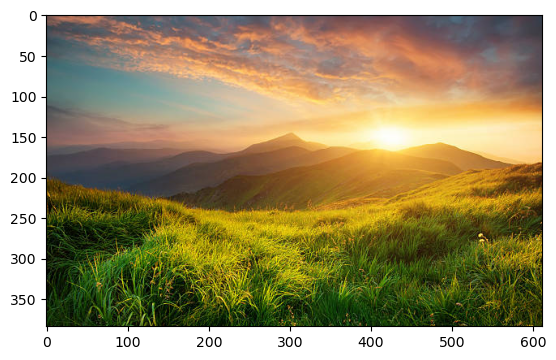

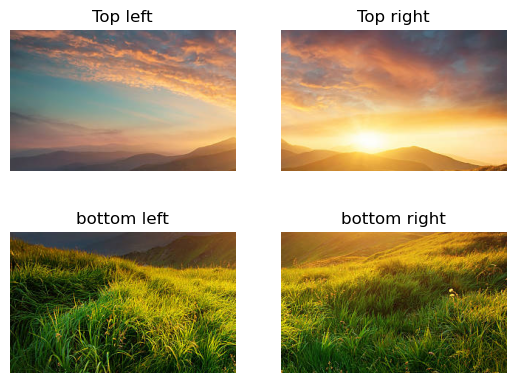

In [10]:
#Program 7

import cv2
import matplotlib.pyplot as plt
image=cv2.imread('index.jpg')
image_mat=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ht,wd,c=image.shape
midy=ht//2
midx=wd//2
plt.imshow(image_mat)
tl=image_mat[:midy,:midx]
tr=image_mat[:midy,midx:]
bl=image_mat[midy:,:midx]
br=image_mat[midy:,midx:]
fig,axs=plt.subplots(2,2)
l_title=["Top left","Top right","bottom left","bottom right"]
l_var=[tl,tr,bl,br]
k=0
for i in range(2):
    for j in range(2):
       axs[i,j].imshow(l_var[k])
       axs[i,j].set_title(l_title[k])
       axs[i,j].axis("off")
       k+=1
       

#plt.axis("off")
plt.show()


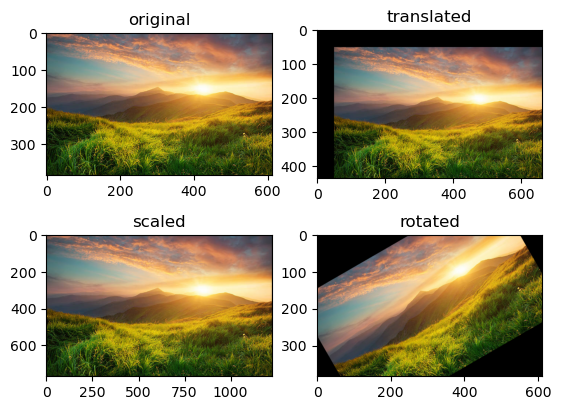

In [12]:
#Program 8

import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread("index.jpg")
image_mat=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ht,wd,c=image.shape
center=(wd/2,ht/2)

trans=np.float32([[1,0,50],[0,1,50]])
scale=np.float32([[2,0,0],[0,2,0]])
rotate=cv2.getRotationMatrix2D(center,30,1)

im_t=cv2.warpAffine(image_mat,trans,(wd+50,ht+50))
im_s=cv2.warpAffine(image_mat,scale,(wd*2,ht*2))
im_r=cv2.warpAffine(image_mat,rotate,(wd,ht))
fig,axs=plt.subplots(2,2)
l_title=["original","translated","scaled","rotated"]
l_var=[image_mat,im_t,im_s,im_r]
k=0
for i in range(2):
    for j in range(2):
       axs[i,j].imshow(l_var[k])
       axs[i,j].set_title(l_title[k])
       #axs[i,j].axis("off")
       k+=1
plt.show()

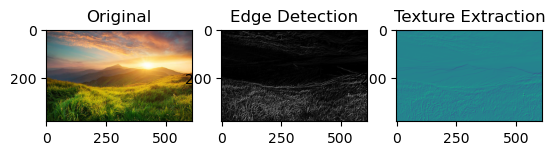

In [1]:
#Program 9

import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('index.jpg')
image_mat= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

edges_x = cv2.filter2D(gray_image, -1, sobel_x)
edges_y = cv2.filter2D(gray_image, -1, sobel_y)

edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)


sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
texture=sobelx+sobely

l_title=["Original","Edge Detection","Texture Extraction"]
l_var=[image_mat,edges_rgb,texture]

fig,axs=plt.subplots(1,3)
for i in range(3):
    axs[i].imshow(l_var[i])
    axs[i].set_title(l_title[i])
    
plt.show()


SSIM between original and blurred images: 0.5926
SSIM between original and smoothed images: 0.6944


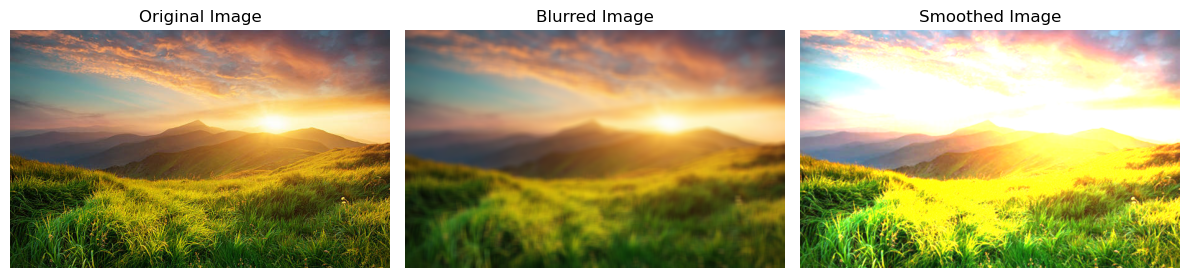

In [4]:
#Program 10

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

image = cv2.imread('index.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kernel_size = 9

blur_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

blurred = cv2.filter2D(image_rgb, -1, blur_kernel)

smooth_kernel = np.array([[2, 2, 2], [2, 10, 2], [2, 2, 2]], dtype=np.float32) / 13

smoothed = cv2.filter2D(image_rgb, -1, smooth_kernel)

gray_original = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
gray_smoothed = cv2.cvtColor(smoothed, cv2.COLOR_RGB2GRAY)

ssim_original_blurred, _ = ssim(gray_original, gray_blurred, full=True)
ssim_original_smoothed, _ = ssim(gray_original, gray_smoothed, full=True)


print(f'SSIM between original and blurred images: {ssim_original_blurred:.4f}')
print(f'SSIM between original and smoothed images: {ssim_original_smoothed:.4f}')

fig, axs = plt.subplots(1,3, figsize=(12, 10))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(blurred)
axs[1].set_title('Blurred Image')
axs[1].axis('off')

axs[2].imshow(smoothed)
axs[2].set_title('Smoothed Image') 
axs[2].axis('off')
plt.tight_layout()
plt.show()

Number of Contours found = 3


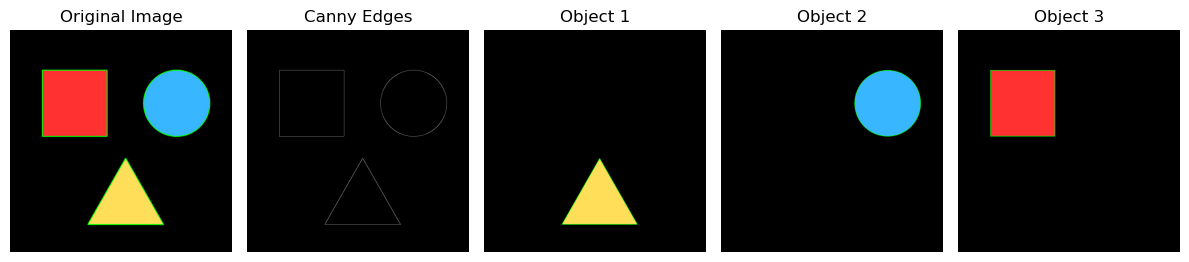

In [8]:
#Program 11

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('shape.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# Create a list to store cropped images of each object
cropped_images = []

# Iterate through contours
for i, contour in enumerate(contours):
    # Create a mask image for each contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    # Extract the object using the mask



    object_extracted = np.zeros_like(image)
    object_extracted[mask == 255] = image[mask == 255]
    # Convert BGR to RGB for displaying with Matplotlib
    object_extracted_rgb = cv2.cvtColor(object_extracted, cv2.COLOR_BGR2RGB)
    # Append the extracted object to the list
    cropped_images.append(object_extracted_rgb)
fig, axs = plt.subplots(1, len(cropped_images)+2, figsize=(12, 4))

# Plot the original image
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edged, cmap='gray')
axs[1].set_title('Canny Edges')
axs[1].axis('off')

for i in range(len(cropped_images)):
    axs[i+2].imshow(cropped_images[i])
    axs[i+2].set_title(f'Object {i+1}')
    axs[i+2].axis('off')

plt.tight_layout()
plt.show()

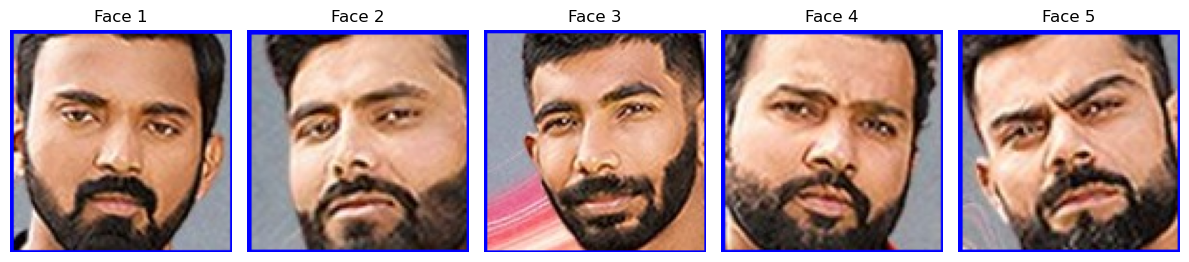

In [9]:
#Program 12

import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'cricket.jpg'
image = cv2.imread(image_path)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Initialize a list to store cropped faces
cropped_faces = []

# Draw rectangles around the detected faces and crop them
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cropped_faces.append(image[y:y+h, x:x+w])

# Display each cropped face separately
plt.figure(figsize=(12, 6))
for i, face in enumerate(cropped_faces):
    plt.subplot(1, len(cropped_faces), i + 1)
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Face {i + 1}')
plt.tight_layout()
plt.show()